In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def trapezoid(x,y):
    N=len(x)
    summ = 0
    for i in range(N-1):
        I = 0.5*(y[i]+ y[i+1])*(x[i+1] - x[i])
        summ = summ + I
    return summ



def right_rectangle(x, y,new_epsilon, new_fe, steps):
    
    m = steps + 1
    area = trapezoid(new_epsilon[0:m],new_epsilon[0:m]**(2)*new_fe[0:m])
    y[1] = (area)/((x[1] - x[0])*x[2]**2)
    for i in range(1,len(x)-1):
        m = steps*i
        n = m + 5 
        area = trapezoid(new_epsilon[m:n],new_epsilon[m:n]**(2)*new_fe[m:n])
        y[i + 1] =(area)/((x[i + 1] - x[i])*x[i + 1]**2)
    return y




def factors(value, x):
    tmp_lst = []
    for i in range(1, value + 1):
        if value % i == 0:
            tmp_lst.append(i) 
    if x in tmp_lst: 
        return True
    else:
        
        return False
    
    
def xy_values(file_name, k):
    
    dat = np.load(file_name)
    fe = dat['f_full']
    epsilon = dat['eps_full']
    
    new_epsilon = np.zeros(len(epsilon) + 1)
    new_epsilon[1:] = epsilon
    new_fe = np.zeros(len(fe) + 1)
    new_fe[1:] = fe
    
    value = epsilon.shape[0]
    
    a = factors(value, k)
    
    if a: 
        x = new_epsilon[::k]
        y = np.zeros(len(x))

        return x, right_rectangle(x, y, new_epsilon, new_fe, k), new_epsilon, new_fe
        
    else:   
        raise Exception(str(k) +' is not a factor of ' + str(value))


**Looks self-contained w/ the plot. The XY function loads the x and y arrays neccesary to lot the number density spectrum**

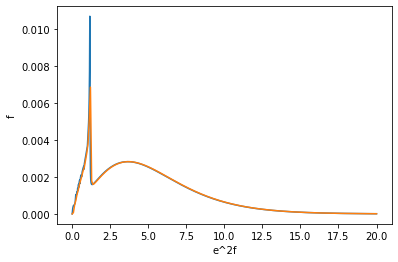

In [59]:
dat = np.load('1x0.00049x3e-09-data.npz')
fe = dat['f_full']
epsilon = dat['eps_full']

a, b, c, d = xy_values('1x0.00049x3e-09-data.npz', 4)

plt.figure()
plt.plot(c, c**(2)*d)
plt.plot(a, a**(2)*b)
plt.xlabel('e^2f')
plt.ylabel("f")
plt.show() ##proportional to a number density spectrum

**KS-TEST & KS-STAT/ PLOTS BELOW**

In [60]:
x, y, w, v = xy_values('1x0.00049x3e-09-data.npz', 4) ##use this instance to test the function

**MAKING THE K X_AXIS (FROM FACTORS OF 1000)**

In [61]:
k_values = []
value = 1000
deviation = []
for i in range(1, value + 1):
        if value % i == 0:
            k_values.append(i)
length = len(k_values)
middle_index = length // 2
first_half = k_values[:middle_index]
second_half = k_values[middle_index:]
print(second_half)

[40, 50, 100, 125, 200, 250, 500, 1000]


In [ ]:


for i in range(len(first_half)):
    current_k = first_half[i]
    ks_test = [] 
    x, y, w, v = xy_values('1x0.00049x3e-09-data.npz', current_k)
    ks_epsilon = w[::current_k]
    ks_x = w[::current_k]
    distribution = np.zeros(len(w))
    total = trapezoid(w, (w**(2)*v))

    for i in range(0,len(distribution)-1):
        distribution[0] = 0
        sliced = trapezoid(w[0:i+2], (w[0:i+2]**(2)*v[0:i+2]))

        a  = sliced/total
        distribution[i + 1]  = a

    for j in range(len(ks_x)): 
    
        eps_value = ks_epsilon[j]   
        x_value = ks_x[j]

        rec_distribution = np.zeros(len(x))
        total2 = trapezoid(x, x**(2)*y)
  
        for i in range(0, len(rec_distribution)-1):
        
            distribution[0] = 0 
            sliced2 = trapezoid(x[0:i+2], x[0:i+2]**(2)*y[0:i+2])
            b = sliced2/total2 
            rec_distribution[i + 1] = b
    
        diff = abs(rec_distribution - distribution[::current_k])
        diff_value = max(diff)
        
    deviation.append(diff_value)

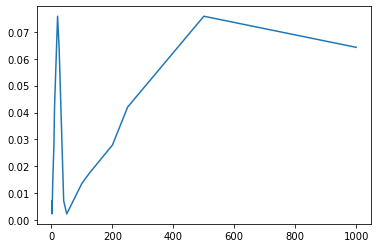

In [34]:
plt.figure()
plt.plot(k_values, deviation)
plt.show()